In [2]:
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment Ready")

Environment Ready


In [7]:
# Setup:
pipe = rs.pipeline()
cfg = rs.config()

# Get device product line for setting a supporting resolution
pipeline_wrapper = rs.pipeline_wrapper(pipe)
pipeline_profile = cfg.resolve(pipeline_wrapper)
device = pipeline_profile.get_device()

rgb_sensor = depth_sensor = None
for s in device.sensors:
    if s.get_info(rs.camera_info.name) == 'RGB Camera':
        rgb_sensor = s
    if s.get_info(rs.camera_info.name) == 'Stereo Module':
        depth_sensor = s
if not rgb_sensor:
    print("The demo requires Depth camera with Color sensor")
    exit(0)
print("Device is set")

Device is set


In [14]:
# Start pipe streaming
cfg.enable_device_from_file("stairs.bag")
profile = pipe.start(cfg)

# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(5):
  pipe.wait_for_frames()
  
# Store next frameset for later processing:
frameset = pipe.wait_for_frames()
depth_frame = frameset.get_depth_frame()
color_frame = frameset.get_color_frame()

# Cleanup:
pipe.stop()
print("Frames are captured")

Frames are captured


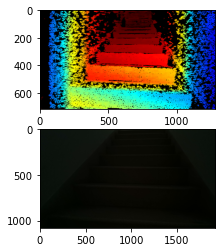

In [39]:
colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())
colorized_color = np.asanyarray(colorizer.colorize(color_frame).get_data())

plt.rcParams["axes.grid"] = False
plt.rcParams['figure.figsize'] = [8, 4]
f, axarr = plt.subplots(2)
axarr[0].imshow(colorized_depth)
axarr[1].imshow(colorized_color)

print("Done!")

In [11]:
if rgb_sensor.supports(rs.option.exposure) :
    rgb_sensor.set_option(rs.option.exposure, 600)
    
if depth_sensor.supports(rs.option.laser_power) :
    depth_sensor.set_option(rs.option.laser_power, 200)
print("Done!")

Done!
